In [2]:
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score




features = [
    "sepal length in cm",
    "sepal width in cm",
    "petal length in cm",
    "petal width in cm",
]

targets = "Class"

# Loading data


In [3]:
#loading data file
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    sep=",",
    names=features + [targets],
)

# Visualizing the data

first using principal component on the 4 covariates to get 3 dimension then plotting them

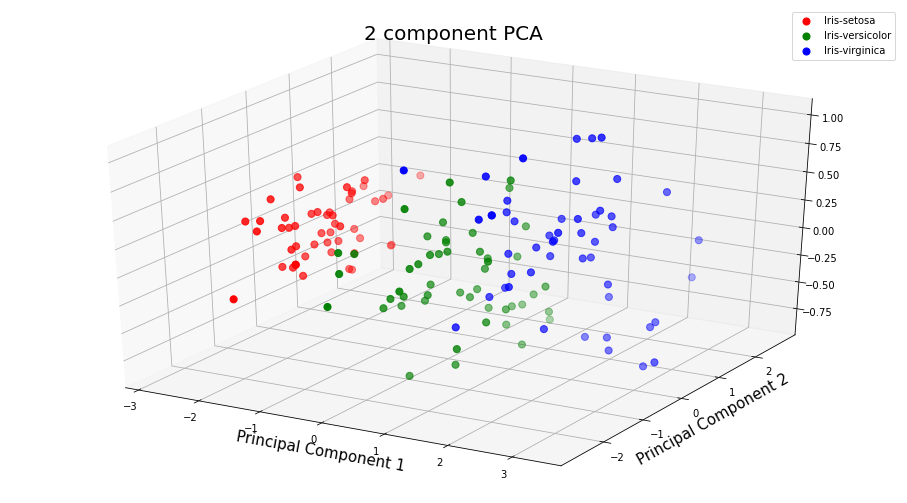

In [4]:
x = data.loc[:, features].values



#print(x)
y = data.loc[:,['Class']].values




# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


finalDf = pd.concat([principalDf, data[['Class']]], axis = 1)

fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter3D(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'],finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

# Choosing hyperparameter through train/validate/test

Chose SVM as algorithm.

Using 2 different trainig models.The difference between them bieng different kernels. One bieng the linear kernel the other bieng the sigmoid.

Using the validation set to find out which hyper parameter c that is optimal and which kernel the is the best for this case.

One see from the plots that the linear kernel works better then the sigmoid kernell for all tested values of hyperparameter c,therefore choosing linear kernel.

c-value for the best preforming linear kernel model is in this case 0.1



Wierd thing thing is that the validation score in bouth cases is higher than the the training scores

1.0


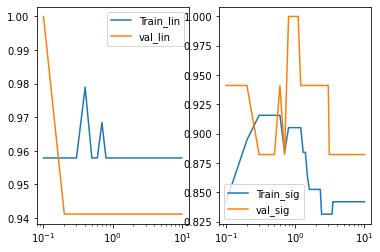

In [16]:
principal=['principal component 1','principal component 2','principal component 3']

#creating an 3x1 array containing the principal components which are the new features.
X = principalDf.loc[:, principal].values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
    
######
N,_=X_train.shape
    
N_test, _=  y_test.shape
#####

ks = np.linspace(0.1, 10, num=100)

model1 = [svm.SVC(kernel='linear', C=k, decision_function_shape='ovo').fit(X_train, y_train.ravel()) for k in ks]
model2 = [svm.SVC(kernel='sigmoid', C=k, decision_function_shape='ovo').fit(X_train, y_train.ravel()) for k in ks]


#calculating the  traing score
train_scores1 = [accuracy_score(y_train, m.predict(X_train)) for m in model1]
train_scores2 = [accuracy_score(y_train, m.predict(X_train)) for m in model2]

#calculating the  validation score in order to choose the model that gives best result
val_scores1 = [accuracy_score(y_val, m.predict(X_val)) for m in model1]
val_scores2=  [accuracy_score(y_val, m.predict(X_val)) for m in model2]

#plotting the trainig and validation scores for both kernels,varying c in bouth cases
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.semilogx(ks, train_scores1, ks, val_scores1)
ax1.legend(["Train_lin", "val_lin"])


ax2.semilogx(ks, train_scores2, ks, val_scores2)
ax2.legend(["Train_sig", "val_sig"])



#finding optimal c by finding the best model(which index in val_score that correspond to the best model placement
#in array).

print(np.amax(val_scores1))


test_scores = accuracy_score(y_test, model1[0].predict(X_test))

#calculating tescores for later use
test_scores1 = [accuracy_score(y_test, m.predict(X_test)) for m in model1]
test_scores2 = [accuracy_score(y_test, m.predict(X_test)) for m in model2]



# Cross validation

Doing the same thing done earlier.Now instead using crossvalidation.The plot confirms that the linear kernel is doing better on average.The c value for the best linear kernel model was earlier 0.1.With cross validation its is 1.0.  

1.0


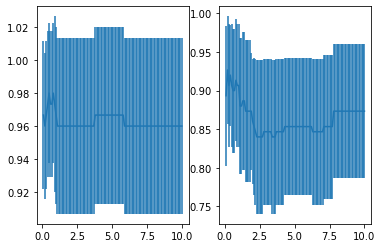

In [13]:

from sklearn.model_selection import cross_val_score

ks = np.linspace(0.1, 10, num=100)

#calling the different models and putting them in a list
untrained_model1 = [svm.SVC(kernel='linear', C=k, decision_function_shape='ovo') for k in ks]
untrained_model2 = [svm.SVC(kernel='sigmoid', C=k, decision_function_shape='ovo') for k in ks]

#doing cross-validation
k_fold_scores1 = [cross_val_score(estimator=m, X=X, y=y.ravel(), cv=10) for m in untrained_model1]
k_fold_scores2 = [cross_val_score(estimator=m, X=X, y=y.ravel(), cv=10) for m in untrained_model2]




fig,(ax3,ax4)=plt.subplots(1,2)
mean_xv_scores_1 = [s.mean() for s in k_fold_scores1]
mean_xv_scores_2 = [s.mean() for s in k_fold_scores2]
ax3.errorbar(ks, mean_xv_scores_1, yerr=[s.std() for s in k_fold_scores1])
ax4.errorbar(ks, mean_xv_scores_2, yerr=[s.std() for s in k_fold_scores2])

#c-value for the best preforming linear kernel model



# Plotting the training accuracy vs the cross-validation

Plotting only for linear ::::::::::::::

0.5 0.4
0.2 0.30000000000000004


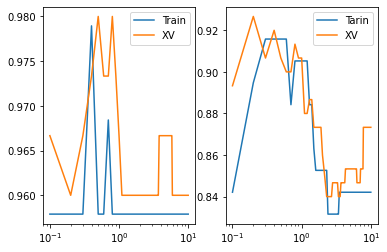

In [21]:
import numpy
k=numpy.asarray(test_scores)
SVM_best_c_xv_1 = numpy.asarray(mean_xv_scores_1).argmax()
SVM_best_c_xv_2 = numpy.asarray(mean_xv_scores_2).argmax()
SVM_best_c_train_1 = numpy.asarray(train_scores1).argmax()
SVM_best_c_train_2 = numpy.asarray(train_scores2).argmax()
SVM_best_c_test_1 = numpy.asarray(test_scores1).argmax()
SVM_best_c_test_2 = numpy.asarray(test_scores2).argmax()
print(ks[SVM_best_c_xv_1], ks[SVM_best_c_train_1])
print(ks[SVM_best_c_xv_2], ks[SVM_best_c_train_2])
#print(k)
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.semilogx(ks, train_scores1, ks, mean_xv_scores_1)
ax2.semilogx(ks, train_scores2, ks,  mean_xv_scores_2)
ax1.legend(["Train",  "XV"])
ax2.legend(["Tarin",  "XV"])

knn_best_model_xv = model1[SVM_best_c_xv_1]

# Let's select the best model on the basis of the XV score, as we must, since the 'test' result is invisible to us
#knn_best_model_xv = models[knn_best_k_xv]

In [18]:
import sklearn.utils 
n_bootstrap_samples = 1000 

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

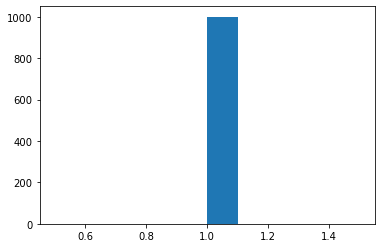

In [171]:
#  estimating the sensitivity of the algorithm to the test data
bootstrap_test_score = numpy.zeros(n_bootstrap_samples)


for t in range(n_bootstrap_samples):
    bootstrap_sample = sklearn.utils.resample(y_test.ravel(), replace=True, n_samples = N_test)
    
    bootstrap_test_score[t] = accuracy_score(y_test.ravel(), knn_best_model_xv.predict(X_test))
    
   
plt.hist(bootstrap_test_score)


#use cross validation for the chioce of which kernel to use,and then dependending on what model is bestuse cross validation
#to find the best c and gamma

#Then do the same procedure for bootstrapp insteed of cross validation if you want

#then use bootstarp to get similar datas as the initial data and to the procedure over again



(array([113., 101., 294., 168., 113.,  81.,  99.,  12.,  16.,   3.]),
 array([0.        , 0.08684211, 0.17368421, 0.26052632, 0.34736842,
        0.43421053, 0.52105263, 0.60789474, 0.69473684, 0.78157895,
        0.86842105]),
 <a list of 10 Patch objects>)

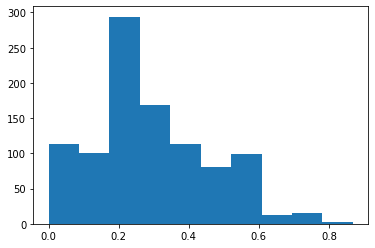

In [23]:
#  estimating the sensitivity of the algorithm to the training data and plotting it
bootstrap_score = numpy.zeros(n_bootstrap_samples)


for t in range(n_bootstrap_samples):
    bootstrap_sample_y = sklearn.utils.resample(y_train.ravel(), replace=True, n_samples = N)
    bootstrap_sample_X = sklearn.utils.resample(X_train, replace=True, n_samples = N)
    bootstrap_model = svm.SVC(kernel='linear', C=SVM_best_c_xv_1, decision_function_shape='ovo').fit(bootstrap_sample_X,bootstrap_sample_y)
    
  
    bootstrap_score[t] = accuracy_score(y_test.ravel(), bootstrap_model.predict(X_test))
plt.hist(bootstrap_score)